In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import pandas as pd

# Load the dataset with full path
df = pd.read_csv('/kaggle/input/mlsalary-dataset/Salary_dataset.csv')

# Continue with the rest of the code for investigating and handling missing values


In [4]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892
...,...,...,...
118,118,14.0,147063
119,119,14.5,148444
120,120,14.5,148938
121,121,14.5,149035


In [5]:
# Investigate missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0         0
YearsExperience    1
Salary             3
dtype: int64


In [12]:
# Investigate missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values
# For numerical columns, you can fill missing values with the mean or median
# For categorical columns, you can fill missing values with the mode (most frequent value)

# Example for filling missing values in numerical columns with mean
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].mean())

# Example for filling missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Verify if missing values are handled
missing_values_after_filling = df.isnull().sum()
print("\nMissing Values After Filling:")
print(missing_values_after_filling)

# Now df contains the dataset with missing values handled

Missing Values:
Unnamed: 0         0
YearsExperience    1
Salary             3
dtype: int64

Missing Values After Filling:
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


In [13]:
# Investigate if there are any remaining missing values
remaining_missing_values = df.isnull().sum()
print("\nRemaining Missing Values:")
print(remaining_missing_values)


Remaining Missing Values:
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


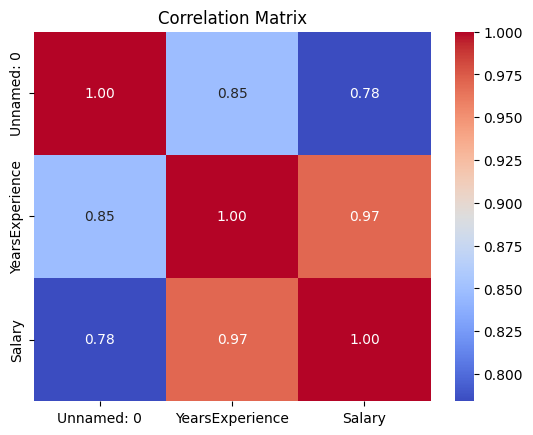

In [17]:
# Convert non-numeric values to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df_numeric = df_numeric.dropna()

# Calculate correlation matrix
corr = df_numeric.corr()

# Visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


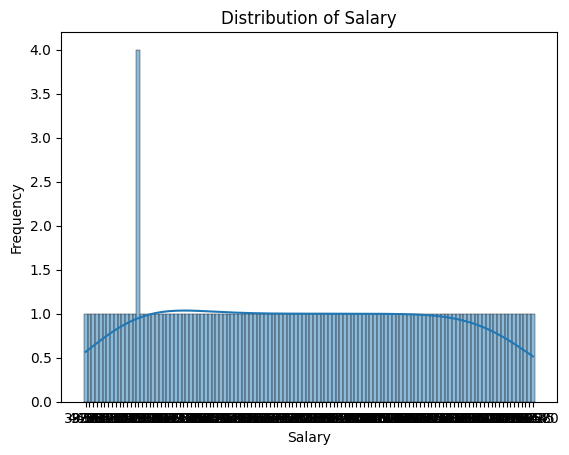

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


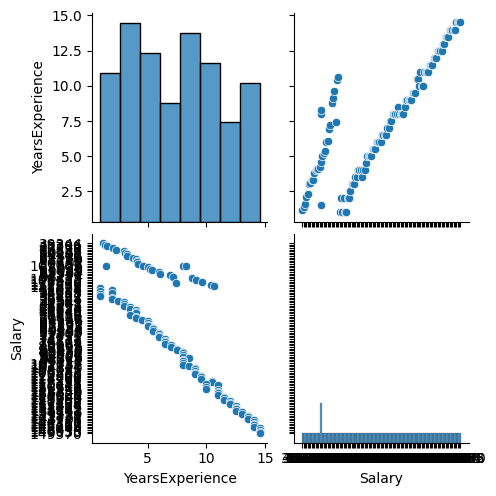

ValueError: could not convert string to float: 'na'

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable (e.g., Salary)
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between numerical features and the target variable
sns.pairplot(df, vars=['YearsExperience', 'Salary'])
plt.show()

# Visualize the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Filter out rows with non-numeric values in the 'Salary' column
df_numeric = df[pd.to_numeric(df['Salary'], errors='coerce').notna()]

# Select features and target variable
X = df_numeric[['YearsExperience']]  # Feature
y = df_numeric['Salary']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 63712147.97614871
Mean Absolute Error: 5928.27820774512
R-squared: 0.9525182612809805


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Filter out non-numeric values in the target variable 'Salary'
df_numeric = df[pd.to_numeric(df['Salary'], errors='coerce').notna()]

# Convert 'Salary' column to numeric values
df_numeric.loc[:, 'Salary'] = pd.to_numeric(df_numeric['Salary'], errors='coerce')

# Drop rows with NaN values
df_numeric = df_numeric.dropna()

# Select features and target variable
X = df_numeric[['YearsExperience']]  # Feature
y = df_numeric['Salary']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', RandomForestRegressor())  # Random Forest Regressor
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 48787359.84580466
Mean Absolute Error: 4362.849289340652
R-squared: 0.9636410206440302


In [31]:
# Replace 'na' strings with NaN
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Impute missing values with the mean
mean_salary = df['Salary'].mean()
df['Salary'].fillna(mean_salary, inplace=True)


/tmp/ipykernel_33/2174629792.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(mean_salary, inplace=True)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df contains the dataset with relevant features and target variable

# Selecting features and target variable
X = df[['YearsExperience']]  # Feature
y = df['Salary']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



ValueError: could not convert string to float: 'na'